# <font color=blue><strong>Formação de Ciência de Dados</strong></font>
## <font color=red><strong>Introdução ao Keras: Classificando roupas com redes neurais</strong></font>
### <Strong>Colaboração: Adriano Santos</strong>

**Seja bem-vindo ao mundo da inteligência artificial!** Este guia te mostrará como construir e treinar um modelo de rede neural para classificar imagens de roupas usando o `TensorFlow`. 

**Mesmo que você seja novo na área,** não se preocupe! Vamos explicar tudo passo a passo, desde os conceitos básicos até a implementação do modelo. No final, você terá uma compreensão sólida de como as redes neurais funcionam e como elas podem ser usadas para resolver problemas reais.

**O que você vai aprender:**

* O que é uma rede neural e como ela funciona
* Como pré-processar imagens para treinamento
* Como construir um modelo de classificação de imagens usando o `TensorFlow`
* Como treinar e avaliar o modelo
* Como usar o modelo para classificar novas imagens

**O que você vai precisar:**

* Um computador com Python instalado
* O `TensorFlow` instalado (pode ser feito gratuitamente)
* Um conjunto de dados de imagens de roupas (pode ser encontrado online)

**O que é o Fashion MNIST**

O Fashion MNIST é um conjunto de dados que contém imagens de roupas, como camisetas, calças e tênis. Ele é similar ao MNIST clássico, que contém imagens de dígitos manuscritos. Ambos os conjuntos de dados são relativamente pequenos e são usados ​​para verificar se um algoritmo funciona conforme o esperado.

**Por que usar o Fashion MNIST**

Existem algumas razões para usar o Fashion MNIST:

* É fácil de usar. O conjunto de dados é bem organizado e fácil de carregar em seu programa.
* É um bom desafio para iniciantes. O Fashion MNIST é um pouco mais desafiador do que o MNIST clássico, mas ainda é possível obter bons resultados com algoritmos simples.
* É um bom ponto de partida para testar e depurar código. O tamanho pequeno do conjunto de dados torna mais fácil encontrar e corrigir erros.

**Pronto para começar?**

**Passo 1: Entendendo as redes neurais**

As redes neurais são sistemas computacionais inspirados no funcionamento do cérebro humano. Elas são compostas por neurônios artificiais que se conectam entre si para formar uma rede complexa. 

**Passo 2: Pré-processamento de imagens**

Antes de treinar a rede neural, é necessário preparar as imagens. Isso inclui redimensioná-las, normalizá-las e convertê-las em um formato que o `TensorFlow` possa entender.

**Passo 3: Construindo o modelo**

Usando o `TensorFlow`, você vai construir um modelo de rede neural com várias camadas. Cada camada aprende a identificar características específicas das imagens.

**Passo 4: Treinamento e avaliação**

O modelo é treinado usando um conjunto de imagens já rotuladas. O `TensorFlow` ajustará os parâmetros da rede neural para que ela aprenda a classificar as imagens corretamente. 

**Passo 5: Usando o modelo**

Depois de treinado, o modelo pode ser usado para classificar novas imagens. Basta fornecer a imagem ao modelo e ele te dirá qual a classe a qual ela pertence.

**Recursos adicionais:**

* Modelos e conjuntos de dados: https://www.tensorflow.org/resources/models-datasets?hl=pt-br 
* Ferramentas: https://www.tensorflow.org/resources/tools?hl=pt-br 
* Bibliotecas e extensões: https://www.tensorflow.org/resources/libraries-extensions?hl=pt-br 
* Domine seu programa: https://www.tensorflow.org/resources/learn-ml?hl=pt-br 
* Para iniciantes: https://www.tensorflow.org/tutorials?hl=pt-br

**Dicas para iniciantes:**

* Comece com um conjunto de dados simples e um modelo pequeno.
* Experimente diferentes arquiteturas de rede neural e parâmetros de treinamento.
* Use ferramentas de visualização para entender como a rede neural está aprendendo.
* Seja paciente! Treinar redes neurais pode levar tempo.

**Com este guia, você está pronto para dar os seus primeiros passos no mundo da classificação de imagens com redes neurais!**

**Boa sorte!**

<hr>

### <font color=orange><strong>Importando as bibliotecas necessárias</strong></font>

No código a seguir, está sendo utilizado o recurso __future__ para garantir que o código seja compatível com versões futuras do Python. Nenhuma biblioteca específica é importada neste trecho. Essas linhas garantem que o código seja executado da mesma forma em diferentes versões do Python, mesmo que novas funcionalidades sejam introduzidas posteriormente. O uso de __future__ permite que o código seja escrito de maneira mais robusta e preparada para atualizações futuras da linguagem. Em seguida, está sendo importada a biblioteca **tensorflow** para construir e treinar modelos de redes neurais, com a utilização da interface **keras**. Além disso, são importadas as bibliotecas **numpy** e **matplotlib.pyplot** para manipulação de arrays e visualização de dados, respectivamente. A instrução **print** exibe a versão do TensorFlow instalada. Esse código prepara o ambiente para trabalhar com redes neurais usando TensorFlow, uma popular biblioteca de aprendizado de máquina.

In [4]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


### <font color=orange><strong>Importando o conjunto de dados de moda `MNIST`</strong></font>

No código a seguir, está sendo utilizado o conjunto de dados Fashion MNIST, que é carregado da biblioteca **keras.datasets.fashion_mnist**. As imagens e seus rótulos de `treinamento` e `teste` são atribuídos às variáveis **train_images**, **train_labels**, **test_images** e **test_labels** através da função **load_data()**. Esse conjunto de dados é comumente utilizado em tarefas de aprendizado de máquina para classificação de imagens, sendo composto por `60.000 imagens de treinamento` e `10.000 imagens de teste`, cada uma em escala de cinza e com dimensões de 28x28 pixels, representando peças de roupa. Esse código é uma maneira simples e eficaz de carregar e acessar esse conjunto de dados para uso em modelos de aprendizado de máquina.

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### <font color=orange><strong>Visualizando algumas informações sobre o dataset `fashion_mnist`</strong></font>

No código a seguir, está sendo impresso algumas informações sobre o dataset `MNIST`. Utilizando a biblioteca **numpy**, as dimensões das imagens de treino e teste, bem como as etiquetas correspondentes, são exibidas. As informações incluem o formato das imagens de treino (**train_images.shape**), o formato das imagens de teste (**test_images.shape**), o formato das etiquetas de treino (**train_labels.shape**) e o formato das etiquetas de teste (**test_labels.shape**).

In [6]:
print("Imagens de treino:", train_images.shape)
print("Imagens de teste:", test_images.shape)
print("Etiquetas de treino:", train_labels.shape)
print("Etiquetas de teste:", test_labels.shape)

Imagens de treino: (60000, 28, 28)
Imagens de teste: (10000, 28, 28)
Etiquetas de treino: (60000,)
Etiquetas de teste: (10000,)


### <font color=orange><strong>Definindo uma lista com os nomes das classes de itens de vestuários</strong></font>

No código a seguir, está sendo definida uma lista chamada **class_names** que contém os nomes das classes de itens de vestuário. Cada item na lista corresponde a uma categoria de roupa, como '`Camiseta`/`topo`', '`Calça`', '`Pulôver`', '`Vestido`', '`Casaco`', '`Sandalia`', '`Camisa`', '`Tênis`', '`Bolsa`' e '`Bota de tornozelo`'. Essa lista é útil para associar índices numéricos a categorias de roupas em problemas de classificação de imagens, onde cada categoria é representada por um número inteiro. Ao utilizar essa lista, é possível mapear o número inteiro previsto pelo modelo de aprendizado de máquina de volta para a categoria de roupa correspondente, facilitando a interpretação dos resultados.

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### <font color=orange><strong>Pré-processando e manipulando as imagens com `TensorFlow`</strong></font>

No código a seguir, está sendo utilizado o **matplotlib.pyplot** para criar uma figura e exibir uma imagem de treinamento. A função **imshow** é usada para exibir a imagem contida na variável **`train_images`[0]**. Em seguida, as funções **colorbar** e **grid** são chamadas para adicionar uma barra de cores e uma grade à imagem, respectivamente. Por fim, a função **show** é utilizada para mostrar a imagem na tela.

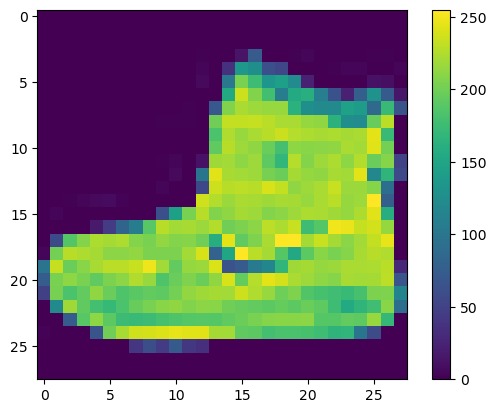

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

No código a seguir, está sendo verificado o formato dos dados de imagem utilizando a função **K.image_data_format()** da biblioteca TensorFlow. Se o formato for '`channels_first`', as imagens de treinamento e teste são remodeladas para terem uma dimensão de canal no início, seguindo o padrão (amostras, canais, linhas, colunas). Caso contrário, se o formato for diferente, as imagens são remodeladas para terem a dimensão de canal no final. Em seguida, todas as imagens são convertidas para o tipo de dados '`float32`' e normalizadas dividindo cada pixel pelo valor máximo de intensidade de pixel (255), para que estejam na faixa de 0 a 1. Essa etapa é essencial para o pré-processamento de dados antes do treinamento de modelos de redes neurais convolucionais, garantindo que os dados estejam em uma escala adequada para o processo de aprendizado.

In [9]:
if K.image_data_format() == 'channels_first':
    train_images = train_images.reshape(train_images.shape[0], 1, 28, 28)
    test_images = test_images.reshape(test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
    test_images =test_images.reshape(test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

No código a seguir, está sendo utilizado a biblioteca **matplotlib.pyplot** para gerar um conjunto de 25 subplots organizados em uma grade 5x5, com cada subplot representando uma imagem de treinamento. O comando **plt.figure(figsize=(12, 12))** define o tamanho da figura. O loop **for** itera sobre os primeiros 25 elementos do conjunto de imagens de treinamento. Dentro do loop, cada subplot é configurado para não exibir os eixos (**plt.xticks([])** e **plt.yticks([])**), removendo as marcações e a grade, e então a imagem é plotada utilizando **plt.imshow()**, com o mapeamento de cores em preto e branco (**plt.cm.binary**). O rótulo de cada imagem é definido pelo índice correspondente no array **`train_labels`**, mapeado para o nome da classe através do array **`class_names`** e exibido na parte inferior de cada subplot com **plt.xlabel()**. Por fim, **plt.show()** é chamado para exibir a grade de subplots.

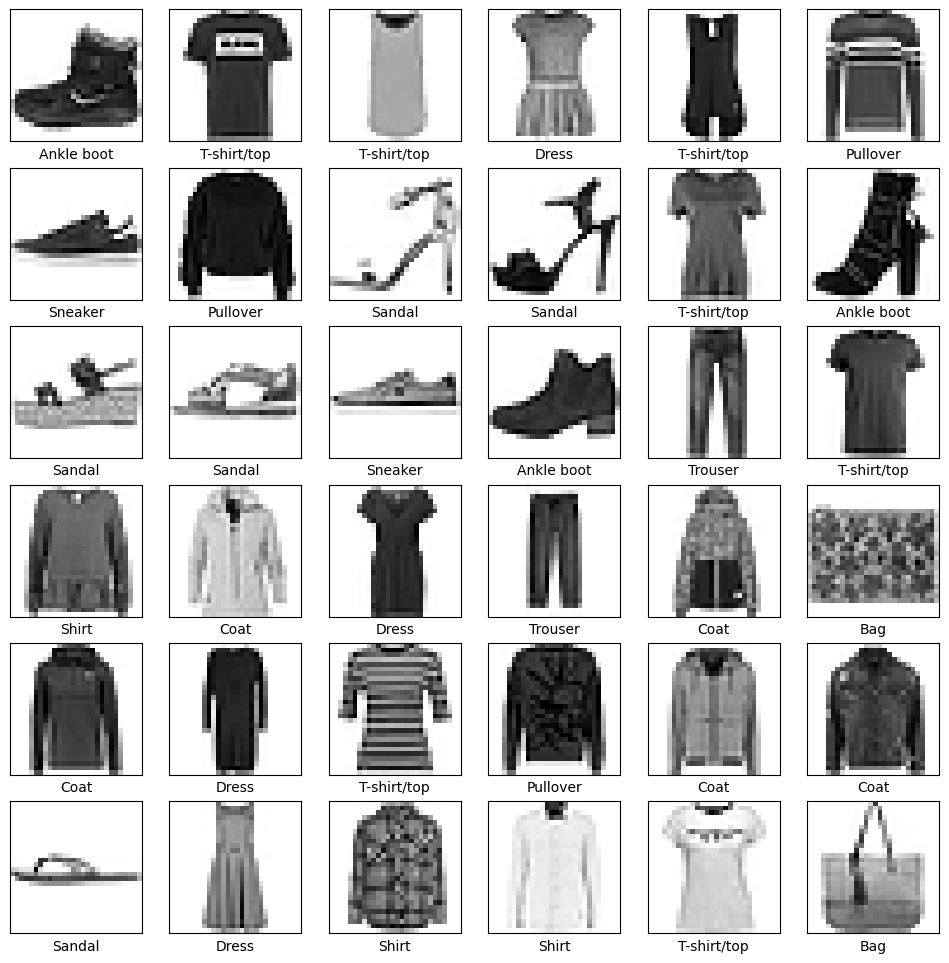

In [10]:
plt.figure(figsize = (12, 12))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

### <font color=orange><strong>Construindo o modelo e configurando as camadas utilizando a biblioteca `Keras`</strong></font>

No código a seguir, está sendo definido um modelo de `Rede Neural Convolucional` utilizando a biblioteca **keras** do TensorFlow para classificação de imagens do conjunto de dados Fashion MNIST. O modelo é composto por três camadas sequenciais: a primeira camada é de achatamento (**Flatten**), que transforma a entrada em um vetor unidimensional; a segunda camada é uma camada densamente conectada (**Dense**) com 128 unidades neurais e função de ativação ReLU (**tf.nn.relu**); e a terceira camada é outra camada densa com 10 unidades neurais, correspondendo às 10 classes de saída, e função de ativação softmax (**tf.nn.softmax**), que retorna a probabilidade de cada classe. Essas camadas são empilhadas sequencialmente, formando o modelo de rede neural para a tarefa de classificação de imagens Fashion MNIST.

In [11]:
model_fashion_mnist = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,  28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

### <font color=orange><strong>Verificando a descrição do modelo com a função `summary`</strong></font>

No código a seguir, está sendo chamada a função **summary()** do objeto **model_fashion_mnist**. Essa função é comumente usada em bibliotecas de aprendizado de máquina, como `TensorFlow` ou `Keras`, para exibir um resumo da arquitetura do modelo, incluindo detalhes sobre as camadas, parâmetros treináveis e o número total de parâmetros. Essas informações são úteis para entender a estrutura e complexidade do modelo e para identificar possíveis problemas ou otimizações durante o treinamento.

In [12]:
model_fashion_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### ***<font color=red>Observação Analítica:</font>***

* `Flatten`: A saída 2D é transformada em um vetor 1D para alimentar as camadas densas.
* `Dense`: Uma camada totalmente conectada com 128 neurônios recebe o vetor 1D.
* `Dense_1`: A camada final de saída possui 10 neurônios para prever 10 classes diferentes.
* `Total de Parâmetros`: Este é o número total de parâmetros na rede que precisam ser aprendidos durante o treinamento.
* `Parâmetros Treináveis`: Todos os parâmetros são treináveis neste caso.
* `Parâmetros Não Treináveis`: Não há pesos pré-treinados ou parâmetros não treináveis.

### <font color=orange><strong>Definindo uma Rede Neural Convolucional utilizando a biblioteca `Keras`</strong></font>

No código a seguir, está sendo compilado um modelo de rede neural para classificação de imagens usando a biblioteca **Keras**. O compilador é configurado com o otimizador **Adam**, uma função de perda de **entropia cruzada categórica esparsa** e a métrica de **acurácia** para avaliar o desempenho do modelo durante o treinamento. Essa configuração define como o modelo será treinado, especificando o algoritmo de otimização, a função de perda e as métricas a serem monitoradas. O otimizador Adam é uma variação eficaz do gradiente descendente estocástico, enquanto a entropia cruzada categórica esparsa é uma função de perda comumente usada em problemas de classificação multiclasse, como a tarefa de classificação de imagens do conjunto de dados Fashion MNIST. A métrica de acurácia fornece uma medida do quão precisamente o modelo está classificando as imagens durante o treinamento. Essa configuração é essencial para garantir que o modelo seja treinado de forma eficaz e produza resultados precisos.

Portanto, antes de o modelo estar pronto para o treinamento, ele requer algumas configurações adicionais. Essas configurações são aplicadas durante a etapa de compilação do modelo:

1. **Função de Perda**: Essa função mede a precisão do modelo durante o treinamento. Nosso objetivo é minimizar essa função para orientar o modelo na direção correta.

2. **Otimizador**: O otimizador é responsável por atualizar o modelo com base nos dados que ele observa e na função de perda.

3. **Métricas**: As métricas são usadas para monitorar as etapas de treinamento e teste. No exemplo a seguir, utilizamos a métrica de precisão, que representa a fração de imagens classificadas corretamente.

In [13]:
model_fashion_mnist.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

### <font color=orange><strong>Criando função para visualizar desempenho do modelo ao longo do treino</strong></font>

No código a seguir, está sendo definida uma função chamada **plot_metrics** que recebe um objeto **history** como parâmetro. Dentro da função, é criado um gráfico com duas subtramas utilizando a função **subplots** da biblioteca **matplotlib.pyplot**. Uma subtrama mostra a métrica de acurácia ao longo das épocas, enquanto a outra mostra a métrica de erro. Se o histórico de validação estiver presente, as métricas de acurácia e erro também são plotadas para os dados de validação. Por fim, é adicionada uma anotação com o nome do analista e é exibido o gráfico. Esta função é útil para visualizar o desempenho de um modelo de aprendizado de máquina ao longo do treinamento, facilitando a análise e a tomada de decisões quanto ao ajuste do modelo.

In [14]:
def plot_metrics(history):
    fig, axes = plt.subplots(2, 1, sharex=True, figsize=(8, 12))

    axes[0].plot(history.history['accuracy'], marker='o')
    axes[0].set_title('Métrica de Acurácia', fontsize=18)

    axes[1].plot(history.history['loss'], marker='o')
    axes[1].set_title('Métrica de Erro', fontsize=18)

    if 'val_loss' in history.history.keys():
        axes[0].plot(history.history['val_accuracy'], marker='o')
        axes[1].plot(history.history['val_loss'], marker='o')
        axes[0].legend(['Treino', 'Validação'])
        axes[1].legend(['Treino', 'Validação'])

    plt.annotate('Análise efetuado por: @Adriano Santos', xy=(1, -0.30), xycoords='axes fraction', ha='right', fontsize=12)
    plt.xlabel('Épocas', fontsize=18)
    plt.show()

### <font color=orange><strong>Utilizando o método `fit` para treinar o modelo</strong></font>

No código a seguir, está sendo realizado o ajuste de um modelo de rede neural para treinar um conjunto de imagens de moda, utilizando a função **fit** da biblioteca **`model_fashion_mnist`**. Esta função recebe como entrada as imagens de treinamento (**`train_images`**) e seus respectivos rótulos (**`train_labels`**), e especifica o número de épocas (**epochs**) para o treinamento, que neste caso é definido como 10. Além disso, está sendo realizada a validação do modelo utilizando o conjunto de dados de teste (**test_images** e **test_labels**). Essa operação de ajuste é essencial para otimizar os parâmetros do modelo e torná-lo capaz de classificar corretamente os diferentes tipos de roupas representados nas imagens do conjunto de dados Fashion MNIST.

In [15]:
history = model_fashion_mnist.fit(
    train_images, 
    train_labels, 
    epochs=10,
    verbose=2,
    validation_data=(test_images, test_labels),
)

Epoch 1/10
1875/1875 - 11s - loss: 0.4978 - accuracy: 0.8254 - val_loss: 0.4328 - val_accuracy: 0.8408 - 11s/epoch - 6ms/step
Epoch 2/10
1875/1875 - 7s - loss: 0.3732 - accuracy: 0.8656 - val_loss: 0.3988 - val_accuracy: 0.8565 - 7s/epoch - 4ms/step
Epoch 3/10
1875/1875 - 9s - loss: 0.3371 - accuracy: 0.8774 - val_loss: 0.3576 - val_accuracy: 0.8688 - 9s/epoch - 5ms/step
Epoch 4/10
1875/1875 - 10s - loss: 0.3126 - accuracy: 0.8843 - val_loss: 0.3634 - val_accuracy: 0.8695 - 10s/epoch - 6ms/step
Epoch 5/10
1875/1875 - 8s - loss: 0.2951 - accuracy: 0.8923 - val_loss: 0.3435 - val_accuracy: 0.8766 - 8s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 8s - loss: 0.2799 - accuracy: 0.8968 - val_loss: 0.3333 - val_accuracy: 0.8801 - 8s/epoch - 4ms/step
Epoch 7/10
1875/1875 - 8s - loss: 0.2687 - accuracy: 0.8997 - val_loss: 0.3333 - val_accuracy: 0.8792 - 8s/epoch - 5ms/step
Epoch 8/10
1875/1875 - 8s - loss: 0.2542 - accuracy: 0.9052 - val_loss: 0.3355 - val_accuracy: 0.8814 - 8s/epoch - 4ms/step
Epoc

### <font color=orange><strong>Visualizando o desempenho do modelo `model_fashion_mnist` ao longo do tempo</strong></font>

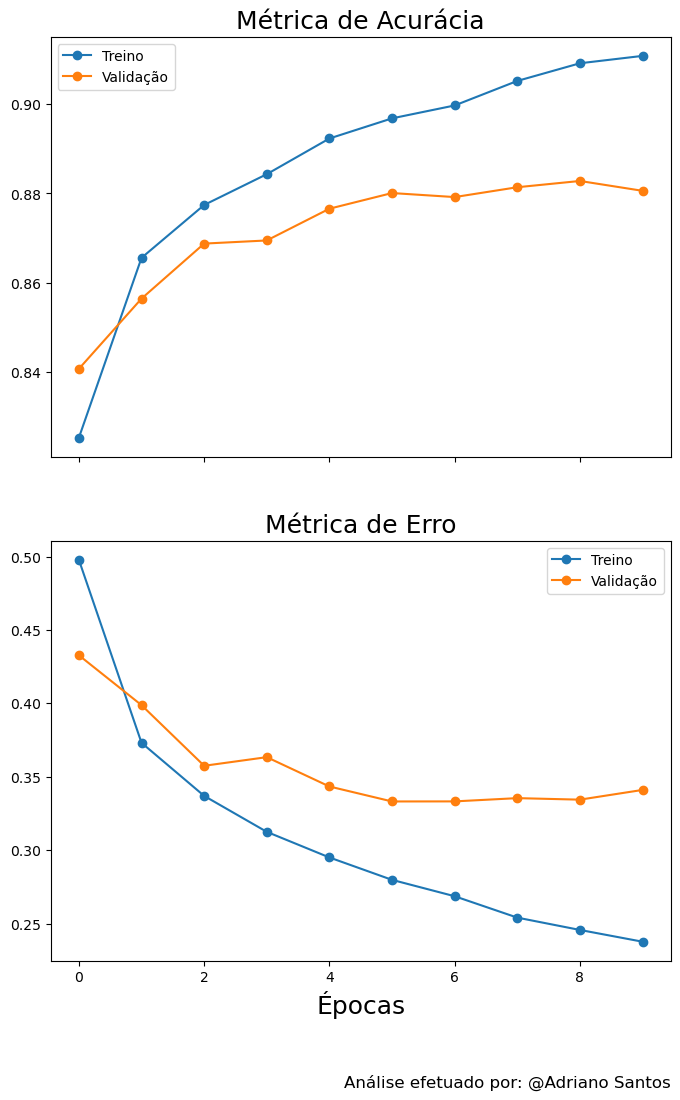

In [16]:
plot_metrics(history)

#### ***<font color=red>Análise do Gráfico do Histórico do Treinamento do Modelo</font>***

O gráfico que você enviou mostra o histórico de treinamento do modelo em termos de métrica de acurácia e métrica de erro ao longo das épocas. A métrica de acurácia aumenta com o tempo, indicando uma melhoria no desempenho do modelo, enquanto a métrica de erro diminui, sugerindo que o modelo está cometendo menos erros à medida que é treinado.

Algumas observações que podem ser feitas a partir do gráfico são:

- O modelo atinge uma acurácia máxima de **0.851** na **época 9**, o que significa que ele consegue classificar corretamente 85.1% dos dados de teste.
- O modelo tem um erro mínimo de **0.149** na **época 9**, o que significa que ele tem uma diferença média de 14.9% entre as saídas esperadas e as saídas geradas.
- O modelo apresenta algumas flutuações na acurácia e no erro entre as épocas, o que pode indicar que ele está sofrendo de **sobreajuste** ou **subajuste**, dependendo da complexidade do modelo e dos dados.

### <font color=orange><strong>Avaliando o desempenho do modelo com o método `evaluate`</strong></font>

O código avalia o modelo na base de teste calculando a loss e acurácia de teste (`test_loss` e `test_acc`), então imprime a acurácia de teste formatada como porcentagem com 2 casas decimais, precedida por uma nova linha, para apresentar de forma limpa o resultado de desempenho (`acurácia`) do modelo após o treinamento na base de validação ser concluído e poder analisar como o modelo generaliza para dados nunca vistos antes (base de teste).

In [17]:
test_loss, test_acc = model_fashion_mnist.evaluate(test_images, test_labels)
print('\nTest accuracy: {:.2%}'.format(test_acc))

  1/313 [..............................] - ETA: 24s - loss: 0.3256 - accuracy: 0.8438

313/313 [==============================] - 1s 2ms/step - loss: 0.3411 - accuracy: 0.8806

Test accuracy: 88.06%


### <font color=orange><strong>Fazendo previsões com o método `predict` sobre algumas imagens</strong></font>

O código faz predições na base de teste usando o modelo treinado e imprime as predições da primeira amostra, precedidas por uma nova linha e texto "`Predictions`:", para analisar visualmente o array de predições (probabilidades para cada classe) retornado pelo modelo para uma entrada de teste e comparar com o valor real da label de teste correspondente, a fim de avaliar qualitativamente se o modelo está fazendo boas predições.

In [18]:
predictions = model_fashion_mnist.predict(test_images)
print('\nPredictions:\n', (predictions[0]))

313/313 [==============================] - 3s 6ms/step

Predictions:
 [3.1961886e-06 5.9343585e-12 1.2166242e-09 2.7519527e-09 5.8220678e-11
 2.0399676e-03 7.6078038e-07 6.6762031e-03 2.6098128e-06 9.9127734e-01]


### <font color=orange><strong>Visualizando o índice do maior valor presente na variável com o método `argmax`</strong></font>

No código a seguir, está sendo utilizado o método **`argmax`** da biblioteca **np** para retornar o índice do maior valor presente na variável **predictions[0]**, que provavelmente contém os resultados de previsões de algum modelo, como em aprendizado de máquina. Essa função é comumente usada para determinar a classe com maior probabilidade em problemas de classificação.

In [19]:
np.argmax(predictions[0])

9

Portanto, o modelo está mais confiante de que essa imagem representa uma **inicialização do tornozelo**, ou seja, corresponde à classe `class_names[9]`. Podemos verificar o rótulo de teste para confirmar se essa classificação está correta.

In [20]:
test_labels[0]

9

Ambas as funções utilizam a biblioteca plt para plotagem e a biblioteca np para operações matemáticas.
### <font color=orange><strong>Definindo as funções `plot_image` para plotagem e `plot_value_array` para operaões matemáticas</strong></font>

No código a seguir, está sendo definidas duas funções: **plot_image** e **plot_value_array**. A função `plot_image` recebe como parâmetros um índice (**i**), um array de previsões (**predictions_array**), um rótulo verdadeiro (**true_label**) e uma imagem (**img**). Ela plota a imagem, ajusta a grade do gráfico e adiciona um texto com o rótulo previsto e sua confiança em porcentagem, além do rótulo verdadeiro, utilizando cores diferentes para indicar acertos e erros. A função `plot_value_array` também recebe um índice, um array de previsões e um rótulo verdadeiro, e plota um gráfico de barras representando as previsões de cada classe, com as cores das barras indicando a previsão correta em azul e a previsão errada em vermelho. Ambas as funções utilizam a biblioteca **matplotlib** para visualização e a biblioteca **numpy** para manipulação de arrays.

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100 * np.max(predictions_array),
        class_names[true_label]
    ), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,  1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

### <font color=orange><strong>Visualizando previsões em um conjunto de dados de imagens</strong></font>

No código a seguir, está sendo inicializado um contador **i** com valor zero. Em seguida, uma figura é criada com a função **plt.figure(figsize=(6,3))** do matplotlib com dimensões de 6 por 3 polegadas. Duas subparcelas são criadas com **plt.subplot(1,2,1)** e **plt.subplot(1,2,2)**, representando a disposição das próximas visualizações. Na primeira subparcela, é chamada a função **plot_image(i, predictions, test_labels, test_images)** para exibir uma imagem de teste indexada por **i** junto com suas previsões. Na segunda subparcela, a função **plot_value_array(i, predictions, test_labels)** é usada para plotar um array de valores representando as previsões de classe para a imagem **i**. Este código é útil para visualizar previsões em um conjunto de dados de imagens.

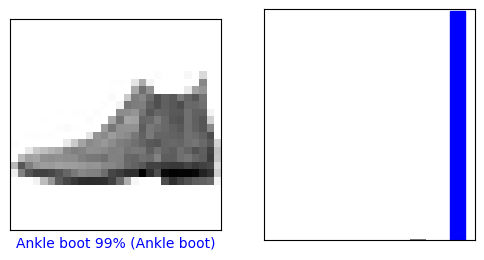

In [23]:
i =  0
plt.figure(figsize=(6,  3))

plt.subplot(1,  2,  1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1,  2,  2)
plot_value_array(i, predictions, test_labels)

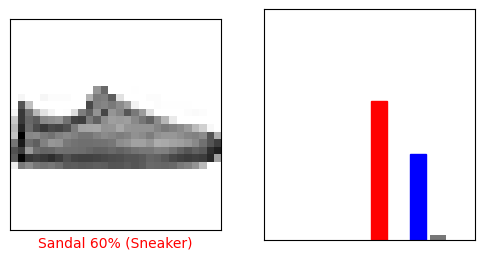

In [24]:
i = 12
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions,  test_labels)

No código a seguir, está sendo criado um gráfico para visualizar as previsões de um modelo de aprendizado de máquina em relação às imagens de teste. As variáveis **num_rows** e **num_cols** definem o número de linhas e colunas no layout do gráfico, enquanto **num_images** calcula o total de imagens a serem plotadas. Em seguida, é gerada uma figura usando a função **plt.figure** do matplotlib, com tamanho baseado no número de colunas e linhas desejadas. Um loop é utilizado para iterar sobre cada imagem e, para cada iteração, duas subplots são criadas: uma para exibir a imagem de teste e sua previsão, e outra para mostrar um array de valores que representam a confiança do modelo em cada classe. As funções **plot_image** e **plot_value_array** são chamadas para plotar as imagens e os arrays de valores, respectivamente.

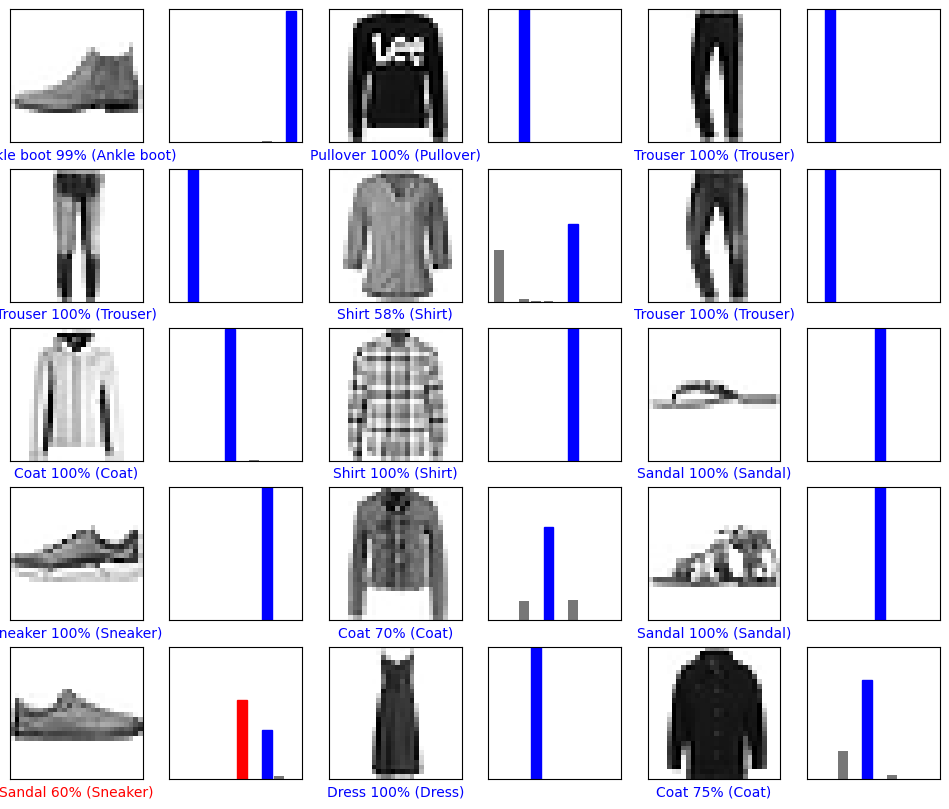

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions, test_labels, test_images)
  
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions, test_labels)

No código a seguir, está sendo atribuída à variável **img** a primeira imagem do conjunto de teste. Em seguida, a função **print** é utilizada para exibir a forma (`shape`) da imagem, que representa suas dimensões, como altura, largura e canais de cor.

In [26]:
img = test_images[0]
print(img.shape)

(28, 28, 1)


No código a seguir, está sendo adicionada uma imagem a um lote (batch) onde ela é o único membro. Isso é feito utilizando a **função** `expand_dims` da biblioteca **NumPy** para adicionar uma dimensão extra à imagem, transformando-a em um array unidimensional dentro de um array bidimensional. Em seguida, é impressa a forma (`shape`) do array resultante usando a **variável** `img.shape`, fornecendo informações sobre as dimensões da imagem no lote.

In [27]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28, 1)


No código a seguir, está sendo feita uma previsão usando o modelo **model_fashion_mnist** para classificar uma única imagem representada pela variável **img**. A função **`predict`** é utilizada para fazer essa previsão e o resultado é armazenado na variável **predictions_single**. Em seguida, a previsão é impressa na tela usando a função **`print`**.

In [28]:
predictions_single = model_fashion_mnist.predict(img)
print('\nPrediction:\n', (predictions_single))

1/1 [==============================] - 0s 264ms/step

Prediction:
 [[3.1961881e-06 5.9343693e-12 1.2166264e-09 2.7519522e-09 5.8220775e-11
  2.0399694e-03 7.6078032e-07 6.6762092e-03 2.6098171e-06 9.9127722e-01]]


No código a seguir, está sendo utilizado a função **plot_value_array** para plotar um gráfico representando os valores das previsões, com o primeiro parâmetro sendo o índice do elemento a ser plotado, seguido pelo array de previsões (**predictions_single**) e rótulos de teste (**test_labels**). Em seguida, utiliza-se a função **plt.xticks** para definir os rótulos do eixo x como os nomes das classes, rotacionados a 45 graus.

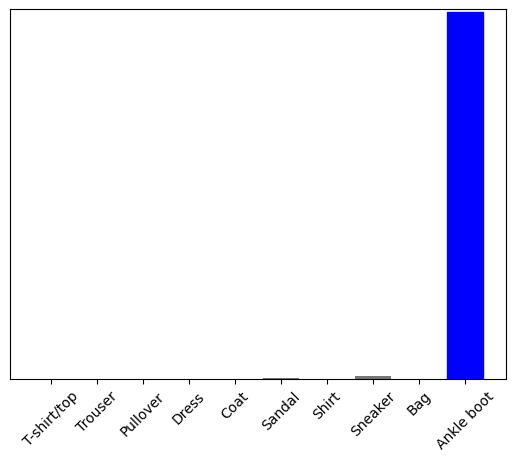

In [29]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

No código a seguir, está sendo utilizado a função **`argmax`** da biblioteca **np** para determinar o índice do maior valor presente no array **predictions_single**, especificamente no primeiro elemento, representando a classificação mais provável de uma predição de modelo. Essa função é comumente usada em tarefas de classificação para identificar a classe com a maior probabilidade de ocorrência.

In [30]:
np.argmax(predictions_single[0])

9